In [128]:
#Разберемся с распределением количества показов и кликов.
#Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).


In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [130]:
ads_data = pd.read_csv('D:/учеба/карпов ч1/[SW.BAND] 6/[SW.BAND] Задания/Минипроект/ads/ads_data.csv')

ads_data[['date', 'time']] = ads_data[['date', 'time']].apply(pd.to_datetime)

In [131]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [132]:
# Считаю сколько показов и кликов у каждого уникального id

count_events= ads_data.groupby(['ad_id', 'event'], as_index=False)\
                                .agg({'time': 'count'})\
                                .rename(columns={'time': 'event_count'})

In [133]:
count_events.head()

,ad_id,event,event_count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [134]:
# Создаю pivot_table для более удобных расчетов

pivot_click_view  = count_events.pivot(index = 'ad_id', columns='event', values='event_count').fillna(0)

In [135]:
pivot_click_view.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [136]:
# Считаю среднее количество кликов и показов

pivot_click_view.mean().round()

event
click    113.0
view     923.0
dtype: float64

In [137]:
#Нарисуйте график распределения показов на объявление за весь период.

In [138]:
# Считаю количесвто показов на каждое объявление

view_table = ads_data.query('event=="view"')\
                     .groupby('ad_id')\
                     .agg({'time': 'count'})\
                     .rename(columns={'time':'count_view'})

In [139]:
view_table.head()

,count_view
ad_id,
2,101
3,184
1902,41
2064,35
2132,58


In [140]:
# Добавляю новый столбец с логорифмированными значениями

view_table['log_views'] = np.log(view_table.count_view)

In [141]:
view_table.head()

,count_view,log_views
ad_id,,
2,101,4.615121
3,184,5.214936
1902,41,3.713572
2064,35,3.555348
2132,58,4.060443


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='log_views', ylabel='Density'>

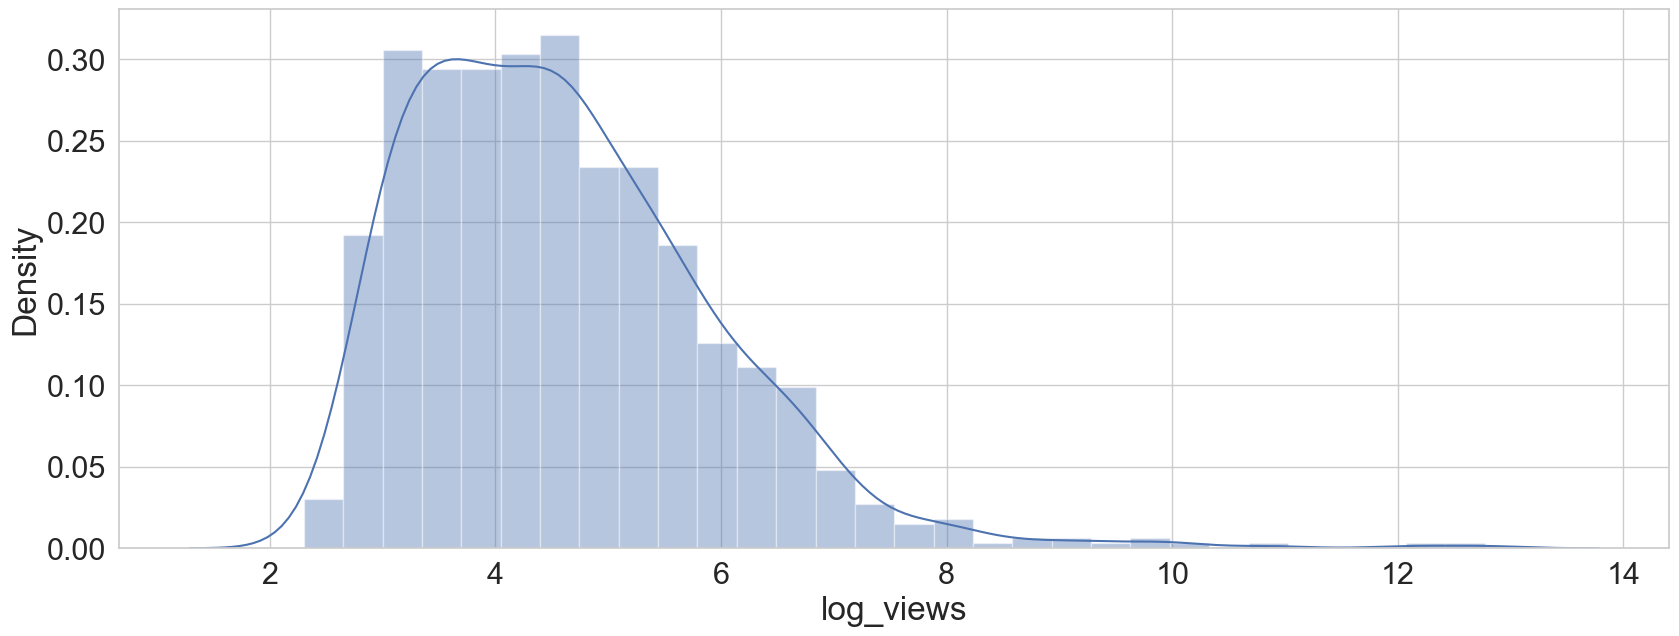

In [142]:
# Строю график распределения показов на объявление за весь период

sns.set(
    font_scale = 2,
    style = "whitegrid",
    rc = {'figure.figsize': (20, 7)})



sns.distplot(view_table.log_views)

In [143]:
#А теперь давайте посчитаем скользящее среднее показов с окном 2. 
#Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [144]:
# Создаю таблицу просмотров по дням для каждого id

view_per_date = ads_data.query('event=="view"')\
                        .pivot_table(index='ad_id',
                                     columns = 'date',
                                     values = 'time',
                                     aggfunc = 'count')

In [145]:
view_per_date.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [146]:
# Считаю реднее арифметическое показов для каждого дня

mean_view = view_per_date.mean()

In [147]:
# Считаю скользящее среднее показов для каждого дня с шагом 2

rolling_views = mean_view.rolling(2).mean()

In [148]:
rolling_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [149]:
#Скользящее среднее часто используется для поиска аномалий в данных. 
#Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. 
#В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
#Дни, в которых скользящее среднее равно NaN, не учитываем. 


<AxesSubplot:xlabel='date'>

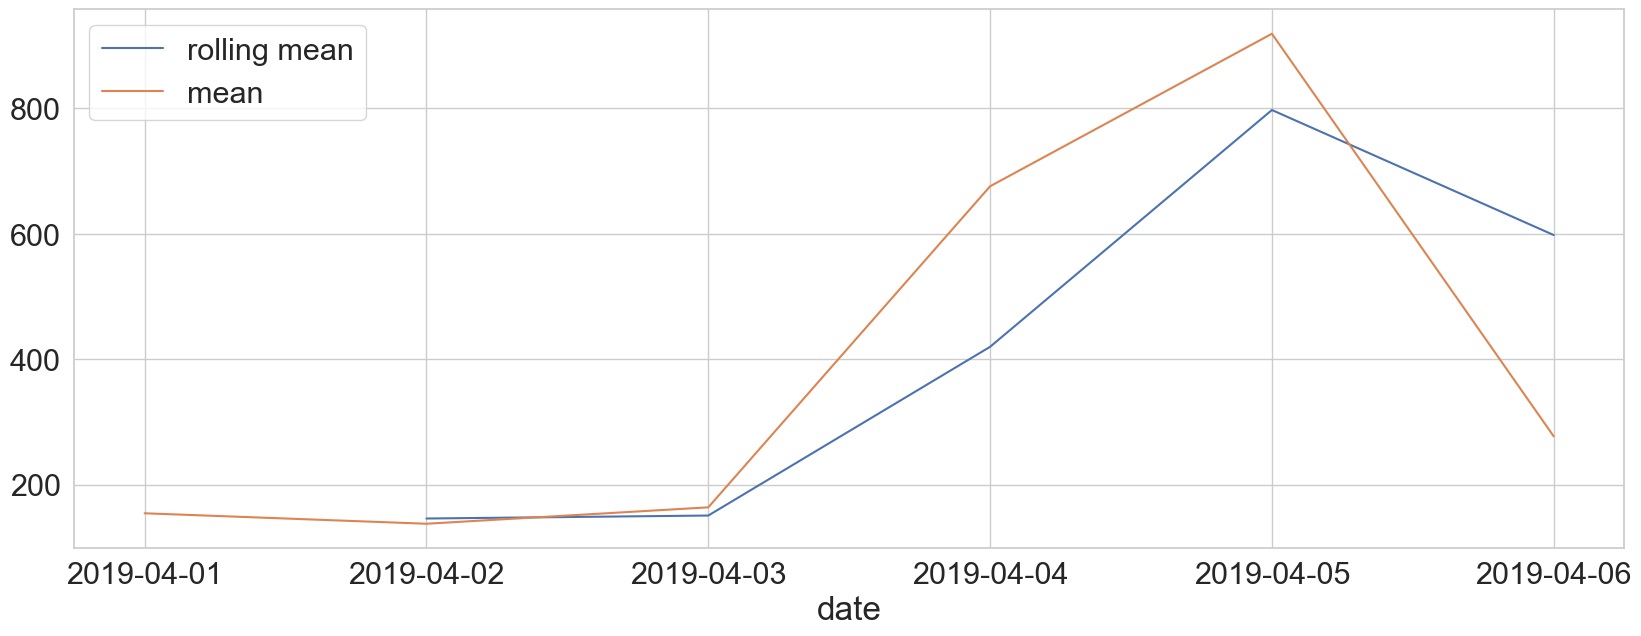

In [150]:
# Строю график значений арифметического среднего количества показов и скользящего среднего количества показов  по дням.

sns.lineplot(data = rolling_views, label = 'rolling mean')
sns.lineplot(data = mean_view, label = 'mean')


In [151]:
# Ищу наибольшую разницу арифметического среднео и скользящего среднего

(mean_view - rolling_views).abs().idxmax()

Timestamp('2019-04-06 00:00:00')

In [152]:
#Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, 
#в который была замечена самая большая по модулю аномалия. 


In [153]:
# Ищу самый аномальный день

anomaly_day = mean_view.subtract(rolling_views)\
                       .abs()\
                       .idxmax()


In [154]:
# Максимальная разница среднего арифметического и скользящего среднего

difference_value = mean_view.subtract(rolling_views)[anomaly_day]

In [155]:
# Ищу id максимального значения показов
if difference_value <= 0:
    anomaly_ad = view_per_date[anomaly_day].idxmax()

# Ищу id минимального значения показов 
else:
    anomaly_ad = view_per_date[anomaly_day].idxmin()

In [156]:
anomaly_ad

112583

In [157]:
view_per_date.loc[112583]

date
2019-04-01         NaN
2019-04-02         NaN
2019-04-03         NaN
2019-04-04         NaN
2019-04-05    302811.0
2019-04-06     48991.0
Name: 112583, dtype: float64

In [158]:
# Функция для поиска id c максимальным по модулю значением показов

def find_anomaly_id(view_table):
    # Find anomaly day
    # Average for each date
    mean_view = view_table.mean()
    # Find date with anomaly, requre mean views
    mean_difference = mean_view.subtract(rolling_views)
    anomaly_day =mean_difference\
                      .abs()\
                      .idxmax()
    # Find sign
    difference_value = mean_difference[anomaly_day]

    # Find maximum view ad
    if difference_value <= 0:
        anomaly_ad = view_table[anomaly_day].idxmax()

    # Find minimum view ad   
    else:
        anomaly_ad = view_table[anomaly_day].idxmin()
    return anomaly_ad

In [159]:
# Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и
# первым запуском рекламного объявления этим клиентом.


In [160]:
ads_client = pd.read_csv('D:/учеба/карпов ч1/[SW.BAND] 6/[SW.BAND] Задания/Минипроект/ads/ads_clients_data.csv')

In [161]:
full_data = ads_data.merge(ads_client.drop(columns=['date', 'community_id']))
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [162]:
# Меняю тип данных на datetime

full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)

In [163]:
# Ищу среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

full_data.groupby('client_union_id')\
         .apply(lambda group: (group.date - group.create_date).min())\
         .mean()

Timedelta('124 days 09:04:43.532219570')

In [164]:
# Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
# Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))


In [165]:
# Создаю переменную равную 365 дней
threshhold = pd.to_timedelta(365, unit = 'd')

In [166]:
# Ищу разницу между созданием рекламного клиента и запуском первой рекламы

creation_difference = full_data.groupby('client_union_id')\
                               .apply(lambda group: (group.date - group.create_date).min())

In [167]:
# Отбираю значения меньше 1 года

creation_difference =creation_difference.loc[creation_difference < threshhold]

In [168]:
# Ищу конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней

CTR = round(creation_difference.shape[0] / ads_client.client_union_id.nunique() * 100, 2 )
CTR

0.69

In [169]:
# Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
# Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]


In [170]:
# Ищу разницу между созданием рекламного клиента и запуском первой рекламы

creation_difference_2 = full_data.groupby('client_union_id')\
                               .apply(lambda group: (group.date - group.create_date).min())

In [171]:
# Создаю промежутки от создания до запуска рекламного объявления 

bins = pd.to_timedelta([0, 30, 90, 180, 365], unit = 'd')

In [172]:
# Считаю количество клиентов, запустивших свое первое объявление по интервалам

pd.cut(creation_difference,
       bins = bins,
       labels = ['0-30', '30-90', '90-180', '180-365'])\
       .value_counts()
        

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64

In [173]:
bins = [pd.to_timedelta('0d'),
        pd.to_timedelta('30d'),
        pd.to_timedelta('90d'),
        pd.to_timedelta('180d'),
        pd.to_timedelta('365d')]

labels = ['first_month',
          '1-3 months',
          '3-6 months',
          '6-12 months']

creation_difference_groups = pd.cut(creation_difference,
                                    bins = bins,
                                    labels = labels)

In [174]:
creation_difference_groups.value_counts()

3-6 months     396
1-3 months     263
6-12 months    168
first_month     11
dtype: int64

In [175]:
# А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [176]:
# Строю график распределения уникальных клиентов по категориям

px.bar(creation_difference_groups.value_counts())